## Train a Multi-layer Perceptron on the MINST Dataset

### import all necessary python modules

In [0]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### set hyperparameters and get training and testing data formatted



In [0]:
batch_size = 128
num_classes = 10
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### take a look at a sample of the data 

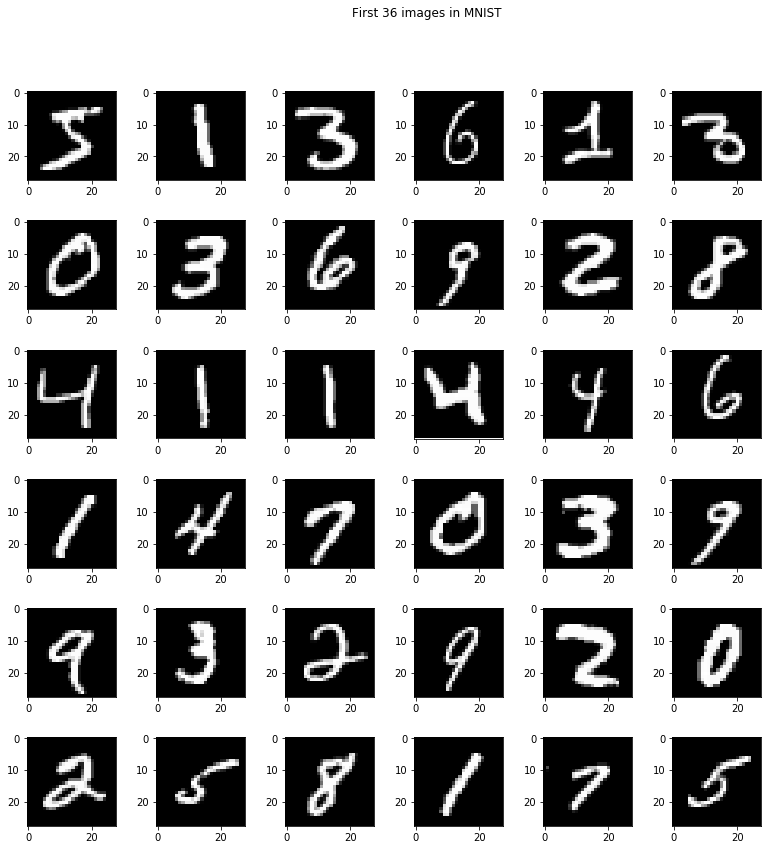

In [0]:
# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')

### build the model and take a look at the model summary

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### compile and train/fit the model

this is where the real work happens and the actual training of the NN

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.2503 - acc: 0.9233 - val_loss: 0.1141 - val_acc: 0.9640
Epoch 2/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.1012 - acc: 0.9689 - val_loss: 0.0828 - val_acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.0750 - acc: 0.9772 - val_loss: 0.0782 - val_acc: 0.9782
Epoch 4/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0619 - acc: 0.9812 - val_loss: 0.0778 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0498 - acc: 0.9847 - val_loss: 0.0757 - val_acc: 0.9808
Epoch 6/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.0430 - acc: 0.9873 - val_loss: 0.0831 - val_acc: 0.9789
Epoch 7/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0387 - acc: 0.9885 - val_loss: 0.

### evaluate the model on the testing dataset

In [0]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 181us/step
Test loss: 0.07681410934893133
Test accuracy: 0.9848


### compare predictions to the input data

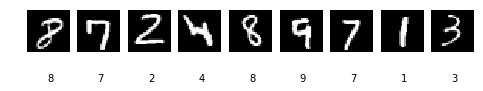

In [0]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 9
rows = 1
indices = np.random.randint(len(x_test), size=(10))
labels = np.argmax(model.predict(x_test[indices]), axis=1)
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_test[indices[i-1]].reshape((28, 28)), cmap = 'gray')
    plt.axis('off')
    plt.text(15,45, labels[i-1],  horizontalalignment='center', verticalalignment='center')
plt.show()